### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [90]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt


# Define the model
model = keras.Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Output layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
sgd_optimizer = SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                11214912  
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [92]:
print(tf.__version__)
print("GPUs: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
GPUs:  1


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

**Answer**: `binary crossentropy`

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

**Answer:** 896

In [93]:
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                11214912  
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True
)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [95]:
# Train the model
history=model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6726 - accuracy: 0.5689 - val_loss: 0.6220 - val_accuracy: 0.6307
Epoch 2/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6388 - accuracy: 0.6296 - val_loss: 0.6024 - val_accuracy: 0.6471
Epoch 3/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5991 - accuracy: 0.6698 - val_loss: 0.5872 - val_accuracy: 0.6732
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5634 - accuracy: 0.7114 - val_loss: 0.5365 - val_accuracy: 0.7255
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5200 - accuracy: 0.7522 - val_loss: 0.5364 - val_accuracy: 0.7309
Epoch 6/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4959 - accuracy: 0.7743 - val_loss: 0.5250 - val_accuracy: 0.7516
Epoch 7/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4610 - accuracy: 0.7941 - val_loss: 0.5078 - val_accuracy: 0.7712

In [96]:
epochs=[i for i in range(1,11)]
train_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]

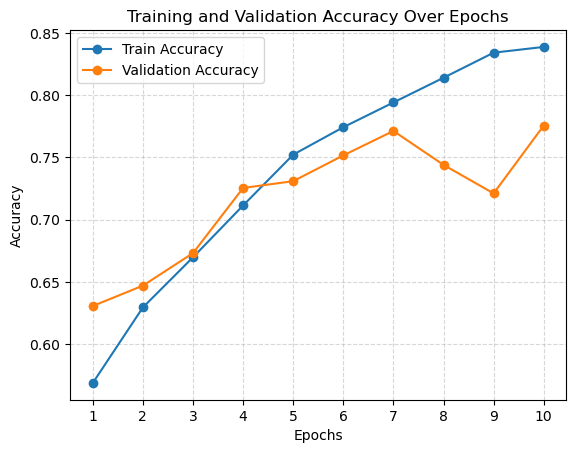

In [97]:
# Plotting the training and validation accuracy
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')


# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

for epoch in epochs:
    plt.xticks(range(1, epoch + 1))

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [98]:
# Get the median of training accuracy
median_train_accuracy = history.history['accuracy']
median_train_accuracy = sorted(median_train_accuracy)[len(median_train_accuracy) // 2]
print(f"{median_train_accuracy:.2f}")

0.77


**Answer:** `0.80` (that's closest)

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

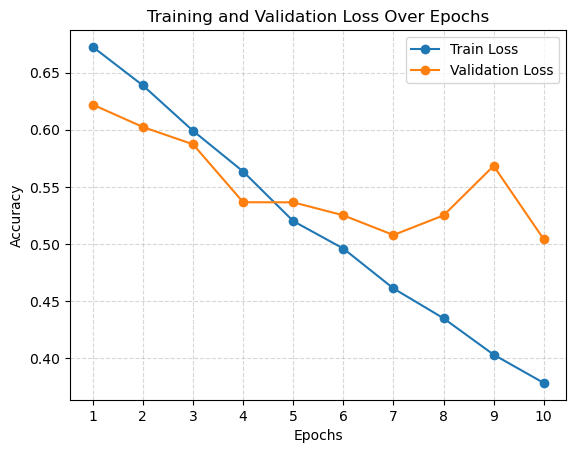

In [99]:
# Plotting the training and validation loss
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss Over Epochs')


# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

for epoch in epochs:
    plt.xticks(range(1, epoch + 1))

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [102]:
# Get the standard deviation of training loss
std_train_loss = np.std(history.history['loss'])

print(f"Standard Deviation of Training Loss: {std_train_loss:.3f}")

Standard Deviation of Training Loss: 0.095


**Answer:** `0.091` (that's closest)

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [101]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


# Create data generators with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define directories for train and test sets
train_dir = './data/train'
val_dir = './data/test'

# Create generators with augmentations
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

val_ds = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

# Continue training the model with data augmentations for 10 more epochs
history_augmented = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)



Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Epoch 1/20
184/184 [==============================] - 24s 131ms/step - loss: 0.4936 - accuracy: 0.7735 - val_loss: 0.4924 - val_accuracy: 0.7723
Epoch 2/20
184/184 [==============================] - 24s 130ms/step - loss: 0.4987 - accuracy: 0.7713 - val_loss: 0.5299 - val_accuracy: 0.7407
Epoch 3/20
184/184 [==============================] - 24s 131ms/step - loss: 0.4826 - accuracy: 0.7775 - val_loss: 0.4650 - val_accuracy: 0.7887
Epoch 4/20
184/184 [==============================] - 24s 129ms/step - loss: 0.4770 - accuracy: 0.7846 - val_loss: 0.4544 - val_accuracy: 0.7843
Epoch 5/20
184/184 [==============================] - 24s 132ms/step - loss: 0.4619 - accuracy: 0.7830 - val_loss: 0.4524 - val_accuracy: 0.7908
Epoch 6/20
184/184 [==============================] - 24s 130ms/step - loss: 0.4646 - accuracy: 0.7898 - val_loss: 0.4828 - val_accuracy: 0.7756
Epoch 7/20
184/184 [===========================

In [106]:
# Calculate the mean of test loss for all epochs including the augmented ones
mean_val_loss_augmented = np.mean(history_augmented.history['val_loss'])

print(f"Mean Validation Loss for Augmented Model:, {mean_val_loss_augmented:.2f}")

Mean Validation Loss for Augmented Model:, 0.48


**Answer:** `0.48`

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [109]:
# Calculate the average of test accuracy for the last 5 epochs
last_5_epochs_test_accuracy = np.mean(history_augmented.history['val_accuracy'][-5:])

print(f"Average Test Accuracy for the Last 5 Epochs:,{last_5_epochs_test_accuracy:.2f}")

Average Test Accuracy for the Last 5 Epochs:,0.80


**Answer:** `0.78` (that's the closest)